In [132]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [133]:
# geospatial
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

## Nashville <b>Crime</b> and Community Amenities Analysis

This project will be an examination of how crime and accessibility of community resources vary
across communities in Nashville and if there are any patterns or correlations to be found
between them. I believe that it could shed light on how underprivileged communities with less
access to amenities such as housing, green areas, and other resources influence crime rates.
The data to be used in this analysis will include local data to Nashville and Davidson county,
much of which is obtained through the Nashville Open Data Portal online.

<h5><b>Data Question</b></h5>
How does crime in Nashville vary across neighborhoods with different community resources,
and what correlations or patterns are there?

### Cleaning

In [134]:
# Read GeoJson
incidents = gpd.read_file('../data/Metro_Nashville_Police_Department_Incidents.geojson')

In [135]:
# Shape
incidents.shape

(894114, 35)

In [136]:
incidents.head(3)

,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,Incident_Location,Latitude,Longitude,RPA,Zone,Location_Code,Location_Description,Offense_Number,Offense_NIBRS,Offense_Description,Weapon_Description,Victim_Number,Domestic_Related,Victim_Type,Victim_Description,Victim_Gender,Victim_Race,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,geometry
0,1,20180005702_23,20180005702,D,DISPATCHED,O,OPEN,Open,BELL RD,36.170,-86.600,9527.0,521.0,90.0,APARTMENT,2.0,520,"WEAPON OFFENSE, CRIMINAL ATTEMPT",HANDGUN,3,No,S,SOCIETY,None,None,None,None,None,None,None,None,01,2018-01-03 02:50:00+00:00,2018-01-03 04:15:00+00:00,POINT (-86.60000 36.17000)
1,2,20180005926_11,20180005926,S,SUSPECT,A,CLEARED BY ARREST,Closed,DICKERSON PIKE & OLD HICKORY BLVD W,36.269,-86.756,NaN,NaN,13.0,"HIGHWAY, ROAD, ALLEY",1.0,35A,MARIJUANA - POSSESS,NONE,1,No,S,SOCIETY,None,None,None,None,None,None,None,37115.0,17,2018-01-03 04:20:00+00:00,2018-01-03 04:42:00+00:00,POINT (-86.75600 36.26900)
2,3,20180005926_21,20180005926,S,SUSPECT,A,CLEARED BY ARREST,Closed,DICKERSON PIKE & OLD HICKORY BLVD W,36.269,-86.756,NaN,NaN,13.0,"HIGHWAY, ROAD, ALLEY",2.0,35B,DRUG PARAPHERNALIA- UNLAWFUL USE,NONE,1,No,S,SOCIETY,None,None,None,None,None,None,None,37115.0,17,2018-01-03 04:20:00+00:00,2018-01-03 04:42:00+00:00,POINT (-86.75600 36.26900)


#### Dropping Empty or Unnecessary Columns

In [137]:
# Set up new DF to trim
incidents_trim = incidents

In [138]:
incidents_trim.columns

Index(['OBJECTID', 'Primary_Key', 'Incident_Number', 'Report_Type',
       'Report_Type_Description', 'Incident_Status_Code',
       'Incident_Status_Description', 'Investigation_Status',
       'Incident_Location', 'Latitude', 'Longitude', 'RPA', 'Zone',
       'Location_Code', 'Location_Description', 'Offense_Number',
       'Offense_NIBRS', 'Offense_Description', 'Weapon_Description',
       'Victim_Number', 'Domestic_Related', 'Victim_Type',
       'Victim_Description', 'Victim_Gender', 'Victim_Race',
       'Victim_Ethnicity', 'Victim_County_Resident', 'Mapped_Location',
       'POINT_X', 'POINT_Y', 'ZIP_Code', 'Weapon_Primary', 'Incident_Occurred',
       'Incident_Reported', 'geometry'],
      dtype='object')

In [139]:
# These all look like empty columns
incidents_trim['POINT_X'].unique()

array([None], dtype=object)

In [140]:
incidents_trim['POINT_Y'].unique()

array([None], dtype=object)

In [141]:
incidents_trim['Mapped_Location'].unique()

array([None], dtype=object)

In [142]:
# Object ID just looks like a 1 based index duplicate
incidents_trim[incidents_trim['OBJECTID'] == incidents_trim['OBJECTID'].max()]

,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,Incident_Location,Latitude,Longitude,RPA,Zone,Location_Code,Location_Description,Offense_Number,Offense_NIBRS,Offense_Description,Weapon_Description,Victim_Number,Domestic_Related,Victim_Type,Victim_Description,Victim_Gender,Victim_Race,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,geometry
894113,894114,20240487277_11,20240487277,D,DISPATCHED,U,UNFOUNDED,Closed,3324 3324,36.084,-86.585,NaN,NaN,53.0,School-Elementary/Secondary,1.0,810,LOST PROPERTY,NONE,1,No,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,None,None,None,37013.0,17,2024-05-24 14:00:00+00:00,2024-07-24 06:51:00+00:00,POINT (-86.58500 36.08400)


In [143]:
# Let's look at the middle columns that keep getting cut out
incidents_trim[['Primary_Key', 'Incident_Number', 'Location_Code', 'Location_Description', 'Offense_Number',
       'Offense_NIBRS', 'Offense_Description', 'Weapon_Description', 'Victim_Number', 'Domestic_Related', 'Victim_Type']].head()

,Primary_Key,Incident_Number,Location_Code,Location_Description,Offense_Number,Offense_NIBRS,Offense_Description,Weapon_Description,Victim_Number,Domestic_Related,Victim_Type
0,20180005702_23,20180005702,90.0,APARTMENT,2.0,520,"WEAPON OFFENSE, CRIMINAL ATTEMPT",HANDGUN,3,No,S
1,20180005926_11,20180005926,13.0,"HIGHWAY, ROAD, ALLEY",1.0,35A,MARIJUANA - POSSESS,NONE,1,No,S
2,20180005926_21,20180005926,13.0,"HIGHWAY, ROAD, ALLEY",2.0,35B,DRUG PARAPHERNALIA- UNLAWFUL USE,NONE,1,No,S
3,20180004613_11,20180004613,22.0,"RESIDENCE, HOME",1.0,220,BURGLARY- AGGRAVATED,PERSONAL (HANDS),1,No,I
4,20180004654_22,20180004654,22.0,"RESIDENCE, HOME",2.0,220,BURGLARY- AGGRAVATED,NONE,2,No,I


In [144]:
# Checking Victim Num
incidents_trim[['Incident_Number', 'Location_Description', 'Offense_Description', 'Weapon_Description', 'Victim_Number']][incidents_trim['Incident_Number'] == 20180005702]

,Incident_Number,Location_Description,Offense_Description,Weapon_Description,Victim_Number
0,20180005702,APARTMENT,"WEAPON OFFENSE, CRIMINAL ATTEMPT",HANDGUN,3
798,20180005702,APARTMENT,"ROBBERY, AGGRAVATED, HANDGUN",HANDGUN,1
799,20180005702,APARTMENT,"ROBBERY, AGGRAVATED, HANDGUN",HANDGUN,2


<h5><b>UNNECESSARY COLUMNS</b></h5>
RPA: MNPD reporting zone for the incident<br>
Zone: MNPD zone / patrol area where the incident occurred<br>
Object ID just is just a 1 based index duplicate<br>

<h5><b>EMPTY COLUMNS</b></h5>
Mapped_Location<br>
POINT_X<br>
POINT_Y<br>

In [145]:
# Dropping unnecessary columns
incidents_trim = incidents_trim.drop(columns=['OBJECTID', 'RPA', 'Zone', 'Mapped_Location', 'POINT_X', 'POINT_Y'])

In [146]:
incidents_trim.head()

,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,Incident_Location,Latitude,Longitude,Location_Code,Location_Description,Offense_Number,Offense_NIBRS,Offense_Description,Weapon_Description,Victim_Number,Domestic_Related,Victim_Type,Victim_Description,Victim_Gender,Victim_Race,Victim_Ethnicity,Victim_County_Resident,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,geometry
0,20180005702_23,20180005702,D,DISPATCHED,O,OPEN,Open,BELL RD,36.170,-86.600,90.0,APARTMENT,2.0,520,"WEAPON OFFENSE, CRIMINAL ATTEMPT",HANDGUN,3,No,S,SOCIETY,None,None,None,None,None,01,2018-01-03 02:50:00+00:00,2018-01-03 04:15:00+00:00,POINT (-86.60000 36.17000)
1,20180005926_11,20180005926,S,SUSPECT,A,CLEARED BY ARREST,Closed,DICKERSON PIKE & OLD HICKORY BLVD W,36.269,-86.756,13.0,"HIGHWAY, ROAD, ALLEY",1.0,35A,MARIJUANA - POSSESS,NONE,1,No,S,SOCIETY,None,None,None,None,37115.0,17,2018-01-03 04:20:00+00:00,2018-01-03 04:42:00+00:00,POINT (-86.75600 36.26900)
2,20180005926_21,20180005926,S,SUSPECT,A,CLEARED BY ARREST,Closed,DICKERSON PIKE & OLD HICKORY BLVD W,36.269,-86.756,13.0,"HIGHWAY, ROAD, ALLEY",2.0,35B,DRUG PARAPHERNALIA- UNLAWFUL USE,NONE,1,No,S,SOCIETY,None,None,None,None,37115.0,17,2018-01-03 04:20:00+00:00,2018-01-03 04:42:00+00:00,POINT (-86.75600 36.26900)
3,20180004613_11,20180004613,D,DISPATCHED,A,CLEARED BY ARREST,Closed,1519 1519,36.149,-86.720,22.0,"RESIDENCE, HOME",1.0,220,BURGLARY- AGGRAVATED,PERSONAL (HANDS),1,No,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,37210.0,09,2018-01-02 20:02:00+00:00,2018-01-02 22:37:00+00:00,POINT (-86.72000 36.14900)
4,20180004654_22,20180004654,D,DISPATCHED,A,CLEARED BY ARREST,Closed,824 824,36.161,-86.798,22.0,"RESIDENCE, HOME",2.0,220,BURGLARY- AGGRAVATED,NONE,2,No,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,37203.0,17,2018-01-02 20:19:00+00:00,2018-01-02 21:29:00+00:00,POINT (-86.79800 36.16100)


#### Renaming Columns

In [147]:
incidents_trim.columns

Index(['Primary_Key', 'Incident_Number', 'Report_Type',
       'Report_Type_Description', 'Incident_Status_Code',
       'Incident_Status_Description', 'Investigation_Status',
       'Incident_Location', 'Latitude', 'Longitude', 'Location_Code',
       'Location_Description', 'Offense_Number', 'Offense_NIBRS',
       'Offense_Description', 'Weapon_Description', 'Victim_Number',
       'Domestic_Related', 'Victim_Type', 'Victim_Description',
       'Victim_Gender', 'Victim_Race', 'Victim_Ethnicity',
       'Victim_County_Resident', 'ZIP_Code', 'Weapon_Primary',
       'Incident_Occurred', 'Incident_Reported', 'geometry'],
      dtype='object')

In [148]:
incidents_trim = incidents_trim.rename(columns={'Primary_Key' : 'primary_key',
                               'Incident_Number' : 'inc_num',
                               'Report_Type' : 'report_code',
                               'Report_Type_Description' : 'report_desc',
                               'Incident_Status_Code' : 'inc_status_code',
                               'Incident_Status_Description' : 'inc_status_desc',
                               'Investigation_Status' : 'investigation_status', 
                               'Incident_Location' : 'inc_loc',
                               'Latitude' : 'lat',
                               'Longitude' : 'long',
                               'Location_Code' : 'loc_code',
                               'Location_Description' : 'loc_desc',
                               'Offense_Number' : 'offense_num',
                               'Offense_NIBRS' : 'offense_nibrs',
                               'Offense_Description' : 'offense_desc',
                               'Weapon_Description' : 'weapon',
                               'Victim_Number' : 'v_num', 
                               'Domestic_Related' : 'domestic_flag',
                               'Victim_Type' : 'v_type',
                               'Victim_Description' : 'v_desc',
                               'Victim_Gender' : 'v_gender',
                               'Victim_Race' : 'v_race',
                               'Victim_Ethnicity' : 'v_ethnicity',
                               'Victim_County_Resident' : 'v_county_resident',
                               'ZIP_Code' : 'zip',
                               'Weapon_Primary' : 'weapon_code',
                               'Incident_Occurred' : 'inc_time',
                               'Incident_Reported' : 'report_time'
                              })
                               

#### Saving flags separately from main dataframe

In [149]:
len(incidents_trim.columns)/2

14.5

In [150]:
# First Half
incidents_trim[['primary_key', 'inc_num', 'report_code', 'report_desc',
                'inc_status_code', 'inc_status_desc', 'investigation_status',
                'inc_loc', 'lat', 'long', 'loc_code', 'loc_desc',
                'offense_num', 'offense_nibrs', 'offense_desc'
               ]].head(2)

,primary_key,inc_num,report_code,report_desc,inc_status_code,inc_status_desc,investigation_status,inc_loc,lat,long,loc_code,loc_desc,offense_num,offense_nibrs,offense_desc
0,20180005702_23,20180005702,D,DISPATCHED,O,OPEN,Open,BELL RD,36.170,-86.600,90.0,APARTMENT,2.0,520,"WEAPON OFFENSE, CRIMINAL ATTEMPT"
1,20180005926_11,20180005926,S,SUSPECT,A,CLEARED BY ARREST,Closed,DICKERSON PIKE & OLD HICKORY BLVD W,36.269,-86.756,13.0,"HIGHWAY, ROAD, ALLEY",1.0,35A,MARIJUANA - POSSESS


In [151]:
incidents_trim['report_desc'].unique()

array(['DISPATCHED', 'SUSPECT', 'WITNESS', None], dtype=object)

In [152]:
incidents_trim['inc_status_desc'].unique()

array(['OPEN', 'CLEARED BY ARREST', 'UNFOUNDED', 'REFUSED TO COOPERATE',
       'PROSECUTION DECLINED', 'DEATH OF OFFENDER',
       'JUVENILE, NO CUSTODY', None, 'EXTRADITION DECLINED'], dtype=object)

In [153]:
# I'm leaving location code in because of the somewhat vast variety of entries
# Plan is to condense some of the location categories into more general places in the future, codes might be useful for that
incidents_trim['loc_desc'].nunique()

62

In [154]:
# Second Half
incidents_trim[['weapon', 'v_num', 'domestic_flag', 'v_type', 'v_desc',
                'v_gender', 'v_race', 'v_ethnicity', 'v_county_resident', 'zip',
                'weapon_code', 'inc_time', 'report_time', 'geometry'
               ]].head(2)

,weapon,v_num,domestic_flag,v_type,v_desc,v_gender,v_race,v_ethnicity,v_county_resident,zip,weapon_code,inc_time,report_time,geometry
0,HANDGUN,3,No,S,SOCIETY,None,None,None,None,None,01,2018-01-03 02:50:00+00:00,2018-01-03 04:15:00+00:00,POINT (-86.60000 36.17000)
1,NONE,1,No,S,SOCIETY,None,None,None,None,37115.0,17,2018-01-03 04:20:00+00:00,2018-01-03 04:42:00+00:00,POINT (-86.75600 36.26900)


In [155]:
incidents_trim['weapon'].unique()

array(['HANDGUN', 'NONE', 'PERSONAL (HANDS)', 'CLUB', 'Unarmed', 'DRUGS',
       'LETHAL/CUTTING INSTRUMENT', 'OTHER', 'REVOLVER', 'SHOTGUN',
       'MOTOR VEHICLE', 'HANDGUN - SEMIAUTOMATIC', None,
       'FIRE/INCENDIARY DEVICES', 'RIFLE', 'OTHER FIREARM', 'POISON',
       'EXPLOSIVES', 'ASPHYXIATION'], dtype=object)

In [156]:
incidents_trim['v_desc'].unique()

array(['SOCIETY', 'INDIVIDUAL (18 AND OVER)', 'BUSINESS', 'UNKNOWN',
       'POLICE OFFICER', 'RELIGIOUS', 'GOVERNMENT',
       'FINANCIAL INSTITUTION', 'OTHER', None,
       'CITIZEN INFORMATION NOTICE', 'DOMESTIC VIOLENCE NOTICE'],
      dtype=object)

In [157]:
# This is the only race information I have so it will be kept
incidents_trim['v_race'].unique()
# 03 is not a code in the metadata, maybe a mistake?

array([None, 'W', 'B', 'U', 'A', 'P', 'I', 'O', 'H', '03', 'T', 'C'],
      dtype=object)

In [158]:
incidents_trim['v_ethnicity'].unique()

array([None, 'Non-Hispanic', 'Hispanic', 'Unknown'], dtype=object)

In [159]:
# SAVING TO FLAG SPECIFIC DATAFRAME

# This will allow me to work with the text/description data more easily and still be able to include the codes later if
# I need to, using the primary_key column to rejoin them
incidents_flags = incidents_trim[['primary_key', 'inc_num', 'report_code', 'inc_status_code', 'offense_nibrs', 'v_type', 'weapon_code']]

In [160]:
# DROPPING FROM INCIDENTS_TRIM
incidents_trim = incidents_trim.drop(columns = ['report_code', 'inc_status_code', 'offense_nibrs', 'v_type', 'weapon_code'])

#### Column Type Cleaning

In [161]:
incidents_trim.head(1)

,primary_key,inc_num,report_desc,inc_status_desc,investigation_status,inc_loc,lat,long,loc_code,loc_desc,offense_num,offense_desc,weapon,v_num,domestic_flag,v_desc,v_gender,v_race,v_ethnicity,v_county_resident,zip,inc_time,report_time,geometry
0,20180005702_23,20180005702,DISPATCHED,OPEN,Open,BELL RD,36.17,-86.6,90.0,APARTMENT,2.0,"WEAPON OFFENSE, CRIMINAL ATTEMPT",HANDGUN,3,No,SOCIETY,None,None,None,None,None,2018-01-03 02:50:00+00:00,2018-01-03 04:15:00+00:00,POINT (-86.60000 36.17000)


In [162]:
incidents_trim.dtypes

primary_key                          object
inc_num                               int64
report_desc                          object
inc_status_desc                      object
investigation_status                 object
inc_loc                              object
lat                                 float64
long                                float64
loc_code                            float64
loc_desc                             object
offense_num                         float64
offense_desc                         object
weapon                               object
v_num                                 int64
domestic_flag                        object
v_desc                               object
v_gender                             object
v_race                               object
v_ethnicity                          object
v_county_resident                    object
zip                                  object
inc_time                datetime64[ns, UTC]
report_time             datetime

In [163]:
# Casting inc_num as text
incidents_trim['inc_num'] = incidents_trim['inc_num'].astype(str)

In [164]:
# Casting loc_code as text
incidents_trim['loc_code'] = incidents_trim['loc_code'].astype(str).str.replace('.0', '')

In [165]:
# Trimming '.0' from zip col
incidents_trim['zip'] = incidents_trim['zip'].str.replace('.0', '')

In [166]:
# Fixing '+00:00' from datetime columns
incidents_trim['inc_time'] = incidents_trim['inc_time'].dt.strftime('%Y-%m-%d %H:%M:%S')
incidents_trim['report_time'] = incidents_trim['report_time'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [167]:
# It's a string now i guess
incidents_trim[['inc_time', 'report_time']].dtypes

inc_time       object
report_time    object
dtype: object

In [168]:
incidents_trim['inc_time'] = pd.to_datetime(incidents_trim['inc_time'], format='%Y-%m-%d %H:%M:%S')
incidents_trim['report_time'] = pd.to_datetime(incidents_trim['report_time'], format='%Y-%m-%d %H:%M:%S')

In [169]:
# Yay fixed
incidents_trim[['inc_time', 'report_time']].dtypes

inc_time       datetime64[ns]
report_time    datetime64[ns]
dtype: object

#### Adding Year Col

In [170]:
incidents_trim.head(2)

,primary_key,inc_num,report_desc,inc_status_desc,investigation_status,inc_loc,lat,long,loc_code,loc_desc,offense_num,offense_desc,weapon,v_num,domestic_flag,v_desc,v_gender,v_race,v_ethnicity,v_county_resident,zip,inc_time,report_time,geometry
0,20180005702_23,20180005702,DISPATCHED,OPEN,Open,BELL RD,36.170,-86.600,90,APARTMENT,2.0,"WEAPON OFFENSE, CRIMINAL ATTEMPT",HANDGUN,3,No,SOCIETY,None,None,None,None,None,2018-01-03 02:50:00,2018-01-03 04:15:00,POINT (-86.60000 36.17000)
1,20180005926_11,20180005926,SUSPECT,CLEARED BY ARREST,Closed,DICKERSON PIKE & OLD HICKORY BLVD W,36.269,-86.756,13,"HIGHWAY, ROAD, ALLEY",1.0,MARIJUANA - POSSESS,NONE,1,No,SOCIETY,None,None,None,None,37115,2018-01-03 04:20:00,2018-01-03 04:42:00,POINT (-86.75600 36.26900)


In [171]:
# Adding specific year column for incident time
incidents_trim['inc_yr'] = incidents_trim['inc_time'].dt.year

In [172]:
# Perf
incidents_trim.head(1)

,primary_key,inc_num,report_desc,inc_status_desc,investigation_status,inc_loc,lat,long,loc_code,loc_desc,offense_num,offense_desc,weapon,v_num,domestic_flag,v_desc,v_gender,v_race,v_ethnicity,v_county_resident,zip,inc_time,report_time,geometry,inc_yr
0,20180005702_23,20180005702,DISPATCHED,OPEN,Open,BELL RD,36.17,-86.6,90,APARTMENT,2.0,"WEAPON OFFENSE, CRIMINAL ATTEMPT",HANDGUN,3,No,SOCIETY,None,None,None,None,None,2018-01-03 02:50:00,2018-01-03 04:15:00,POINT (-86.60000 36.17000),2018


#### Combining rows with same geometry

In [173]:
incidents_trim[incidents_trim['inc_num'] == '20180005702']

,primary_key,inc_num,report_desc,inc_status_desc,investigation_status,inc_loc,lat,long,loc_code,loc_desc,offense_num,offense_desc,weapon,v_num,domestic_flag,v_desc,v_gender,v_race,v_ethnicity,v_county_resident,zip,inc_time,report_time,geometry,inc_yr
0,20180005702_23,20180005702,DISPATCHED,OPEN,Open,BELL RD,36.17,-86.6,90,APARTMENT,2.0,"WEAPON OFFENSE, CRIMINAL ATTEMPT",HANDGUN,3,No,SOCIETY,None,None,None,None,None,2018-01-03 02:50:00,2018-01-03 04:15:00,POINT (-86.60000 36.17000),2018
798,20180005702_11,20180005702,DISPATCHED,OPEN,Open,BELL RD,36.17,-86.6,90,APARTMENT,1.0,"ROBBERY, AGGRAVATED, HANDGUN",HANDGUN,1,No,INDIVIDUAL (18 AND OVER),M,U,Non-Hispanic,RESIDENT,None,2018-01-03 02:50:00,2018-01-03 04:15:00,POINT (-86.60000 36.17000),2018
799,20180005702_12,20180005702,DISPATCHED,OPEN,Open,BELL RD,36.17,-86.6,90,APARTMENT,1.0,"ROBBERY, AGGRAVATED, HANDGUN",HANDGUN,2,No,BUSINESS,None,None,None,None,None,2018-01-03 02:50:00,2018-01-03 04:15:00,POINT (-86.60000 36.17000),2018


In [174]:
# Unique geometry in 2018
incidents_trim[incidents_trim['inc_yr'] == 2018]['geometry'].nunique()

14119

In [175]:
# All rows in 2018
incidents_trim[incidents_trim['inc_yr'] == 2018].shape[0]

124502

In [176]:
#---------------------------------------------------------------------
# Unique geometry in 2019
incidents_trim[incidents_trim['inc_yr'] == 2019]['geometry'].nunique()

13713

In [177]:
# All rows in 2019
incidents_trim[incidents_trim['inc_yr'] == 2019].shape[0]

119736

In [178]:
# what the frick

The question now is.... WHAT DO I DO!!!<br>
<br>
I see no point in plotting points on top of points, and, frankly, I need to be picky with what I plot or how I plot it to conserve every ounce of plotting space I have.<br>
<br>
Combining rows somehow with the geometry column makes the most sense, BUT then I'm positive I would combine some rows that are totally unrelated incidents.<br>
Is there a meaningful way I could combine that information to make the single point informative and respective of each incident at that location?<br>

#### Grouping offenses by type

In [179]:
incidents_trim.head(2)

,primary_key,inc_num,report_desc,inc_status_desc,investigation_status,inc_loc,lat,long,loc_code,loc_desc,offense_num,offense_desc,weapon,v_num,domestic_flag,v_desc,v_gender,v_race,v_ethnicity,v_county_resident,zip,inc_time,report_time,geometry,inc_yr
0,20180005702_23,20180005702,DISPATCHED,OPEN,Open,BELL RD,36.170,-86.600,90,APARTMENT,2.0,"WEAPON OFFENSE, CRIMINAL ATTEMPT",HANDGUN,3,No,SOCIETY,None,None,None,None,None,2018-01-03 02:50:00,2018-01-03 04:15:00,POINT (-86.60000 36.17000),2018
1,20180005926_11,20180005926,SUSPECT,CLEARED BY ARREST,Closed,DICKERSON PIKE & OLD HICKORY BLVD W,36.269,-86.756,13,"HIGHWAY, ROAD, ALLEY",1.0,MARIJUANA - POSSESS,NONE,1,No,SOCIETY,None,None,None,None,37115,2018-01-03 04:20:00,2018-01-03 04:42:00,POINT (-86.75600 36.26900),2018


In [180]:
# Not viable too vast
incidents_trim['offense_desc'].nunique()

594

In [181]:
# I believe it's time to whip out my secret weapon...
# NIBRS!!!!!
incidents_flags.head(1)

,primary_key,inc_num,report_code,inc_status_code,offense_nibrs,v_type,weapon_code
0,20180005702_23,20180005702,D,O,520,S,01


In [182]:
# Much better... still a little rough but I got it
incidents_flags['offense_nibrs'].nunique()

74

In [183]:
# Rejoining the NIBRS column ONLY
incidents_trim = incidents_trim.merge(incidents_flags[['primary_key', 'offense_nibrs']], on='primary_key', how='left')

<h3>I'm referencing the metadata EXTENSIVELY for my next trick</h3>

<p><b>THEFT</b>: '23_', 220 (Burglary), 240 (Motor Vehicle Theft), 120 (robbery)<br>
<br>
<b>MURDER</b>: 09A<br>
<br>
<b>SEXUAL CRIMES</b>: '11_' (forcible), 64A Sexual Human Trafficking, '40_' (Prostitution)<br>
<br>
<b>DRUG CRIMES</b>: '35_'<br>
<br>
<b>PROPERTY CRIMES</b>: 200 Arson, 290 Property Offenses<br>
<br>
<b>DRUNKENNESS/DUI</b>: 90D, 90E<br>
<br>
<b>SUICIDES</b>: 690</p>

In [197]:
# Define row based function to apply to dataframe
def sort_crimes(offense_nibrs):
    print('1: ' + str(offense_nibrs))
    # MURDER
    if '09A' in offense_nibrs:
        return 'MURDER'
    # SUICIDE
    elif '690' in offense_nibrs:
        return 'SUICIDE'
    # SEXUAL CRIMES
    elif offense_nibrs.startswith('11') or offense_nibrs.startswith('40') or '64A' in offense_nibrs:
        return 'SEXUAL'
    # THEFT
    elif offense_nibrs.startswith('23') or offense_nibrs in ['220', '240', '120']:
        return 'THEFT'
    # DRUG
    elif offense_nibrs.startswith('35'):
        return 'DRUG'
    # PROPERTY
    elif offense_nibrs in ['200', '290']:
        return 'PROPERTY'
    # DUI/DRUNKENNESS
    elif offense_nibrs in ['90D', '90E']:
        return 'INTOXICATION'
    else:
        return 'OTHER'

In [198]:
# Initializing empty column
incidents_trim['crime_cat'] = 'placeholder'

In [199]:
incidents_trim.head(1)

,primary_key,inc_num,report_desc,inc_status_desc,investigation_status,inc_loc,lat,long,loc_code,loc_desc,offense_num,offense_desc,weapon,v_num,domestic_flag,v_desc,v_gender,v_race,v_ethnicity,v_county_resident,zip,inc_time,report_time,geometry,inc_yr,offense_nibrs,crime_cat
0,20180005702_23,20180005702,DISPATCHED,OPEN,Open,BELL RD,36.17,-86.6,90,APARTMENT,2.0,"WEAPON OFFENSE, CRIMINAL ATTEMPT",HANDGUN,3,No,SOCIETY,None,None,None,None,None,2018-01-03 02:50:00,2018-01-03 04:15:00,POINT (-86.60000 36.17000),2018,520,placeholder


In [202]:
incidents_trim[['offense_nibrs', 'crime_cat']][0:20]

,offense_nibrs,crime_cat
0,520,placeholder
1,35A,placeholder
2,35B,placeholder
3,220,placeholder
4,220,placeholder
5,290,placeholder
6,23F,placeholder
7,23F,placeholder
8,780,placeholder
9,810,placeholder


In [200]:
# testing

# !!! the function is recieving a list as offense_nibrs?
incidents_trim[['offense_nibrs', 'crime_cat']][0:20].apply(sort_crimes, axis=0)

1: 0     520
1     35A
2     35B
3     220
4     220
5     290
6     23F
7     23F
8     780
9     810
10    740
11    740
12    13C
13    13B
14    13B
15    740
16    740
17    23G
18    13C
19    13C
Name: offense_nibrs, dtype: object


AttributeError: 'Series' object has no attribute 'startswith'

#### Adding Polygons and polygon identification

In [42]:
# Reading in police precinct data for polygons!! yay
precinct_polygons = gpd.read_file('../data/nashville-tn-police-precincts.gpkg')

In [43]:
# PERF
precinct_polygons.head()

,GLOBALID,STArea,PRECINCT,STLength,geometry
0,{02BF999B-4A77-4BE8-B649-F9C1B6791098},2.495822e+09,HERMITAGE,521816.110974,MULTIPOLYGON Z (((-9637158.117 4325329.726 0.0...
1,{6BBB73D8-5BD5-46AE-9F1D-7E45CF656617},3.287797e+09,NORTH,334750.611226,MULTIPOLYGON Z (((-9674900.996 4349896.956 0.0...
2,{AEC0E873-A9E6-4C51-995B-589E9368D587},3.036712e+09,WEST,314367.315791,MULTIPOLYGON Z (((-9684570.064 4318251.690 0.0...
3,{FC11B41E-DA35-4041-82E3-E3DE1D18052E},9.854197e+07,CENTRAL,46234.671731,MULTIPOLYGON Z (((-9659776.741 4321136.257 0.0...
4,{99AB52A5-D98D-47AC-8C6E-989CA7B7FF4D},1.316292e+09,MIDTOWN-HILLS,185915.976901,MULTIPOLYGON Z (((-9667810.747 4306523.185 0.0...


In [44]:
precinct_polygons.shape

(9, 5)

In [45]:
precinct_polygons = precinct_polygons.to_crs(crs='EPSG:4326')

In [63]:
precinct_polygons[0:1].contains(incidents_trim[0:5])

C:\Users\nunuk\AppData\Local\Temp\ipykernel_13688\1905541681.py:1: UserWarning: The indices of the two GeoSeries are different.
  precinct_polygons[0:1].contains(incidents_trim[0:5])


0     True
1    False
2    False
3    False
4    False
dtype: bool

##### doing little maps cause i'm excited :D

<Axes: >

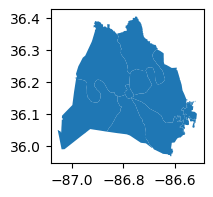

In [47]:
precinct_polygons.plot(figsize=(2,2))

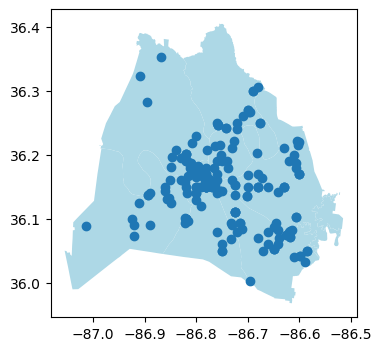

In [48]:
# YIPPEE
ax = precinct_polygons.plot(figsize=(4,4), color='lightblue')
incidents_trim[incidents_trim['inc_yr'] == 2025][0:200].plot(ax = ax);
plt.show();

##### back to regularly scheduled programming

In [ ]:
# I need to do a spatial join
# After my spatial join, I need to eliminate duplicates and join the polygon identifier column to my incidents trim dataframe.

In [50]:
incidents_trim.head(1)

,primary_key,inc_num,report_desc,inc_status_desc,investigation_status,inc_loc,lat,long,loc_code,loc_desc,offense_num,offense_desc,weapon,v_num,domestic_flag,v_desc,v_gender,v_race,v_ethnicity,v_county_resident,zip,inc_time,report_time,geometry,inc_yr
0,20180005702_23,20180005702,DISPATCHED,OPEN,Open,BELL RD,36.17,-86.6,90,APARTMENT,2.0,"WEAPON OFFENSE, CRIMINAL ATTEMPT",HANDGUN,3,No,SOCIETY,None,None,None,None,None,2018-01-03 02:50:00,2018-01-03 04:15:00,POINT (-86.60000 36.17000),2018


In [65]:
# I am PRETTY SURE this is all I need from incidents_trim
incidents_trim[['primary_key', 'geometry']].head(1)

,primary_key,geometry
0,20180005702_23,POINT (-86.60000 36.17000)


In [69]:
# Should be it from precinct polygons
precinct_polygons[['PRECINCT', 'geometry']].head(1)

,PRECINCT,geometry
0,HERMITAGE,"MULTIPOLYGON Z (((-86.57206 36.17936 0.00000, ..."


In [71]:
# Testing... looks good
gpd.sjoin(incidents_trim[['primary_key', 'geometry']][0:10], precinct_polygons[['PRECINCT', 'geometry']], how='left', predicate='intersects')

,primary_key,geometry,index_right,PRECINCT
0,20180005702_23,POINT (-86.60000 36.17000),0,HERMITAGE
1,20180005926_11,POINT (-86.75600 36.26900),7,MADISON
2,20180005926_21,POINT (-86.75600 36.26900),7,MADISON
3,20180004613_11,POINT (-86.72000 36.14900),0,HERMITAGE
4,20180004654_22,POINT (-86.79800 36.16100),1,NORTH
5,20180006084_11,POINT (-86.65000 36.09000),0,HERMITAGE
6,20180007079_11,POINT (-86.80700 36.16400),1,NORTH
7,20180007079_12,POINT (-86.80700 36.16400),1,NORTH
8,20180007631_11,POINT (-86.71500 36.09200),6,SOUTH
9,20180004767_11,POINT (-86.69800 36.01100),6,SOUTH


In [74]:
# Save entire spatial joined dataframe to sjoin for cleaning
sjoin = gpd.sjoin(incidents_trim[['primary_key', 'geometry']], precinct_polygons[['PRECINCT', 'geometry']], how='left', predicate='intersects')

In [75]:
sjoin.head(3)

,primary_key,geometry,index_right,PRECINCT
0,20180005702_23,POINT (-86.60000 36.17000),0.0,HERMITAGE
1,20180005926_11,POINT (-86.75600 36.26900),7.0,MADISON
2,20180005926_21,POINT (-86.75600 36.26900),7.0,MADISON


In [ ]:
# Drop index right
sjoin.drop(columns='index_right')

In [ ]:
# Drop rows with duplicat 'primary_key' values

In [ ]:
# Join back to incidents